In [2]:
import numpy as np
from icecream import ic
from tracker_coordinate_transform import *
import circle_fit as circle
from tracker_coordinate_transform import *

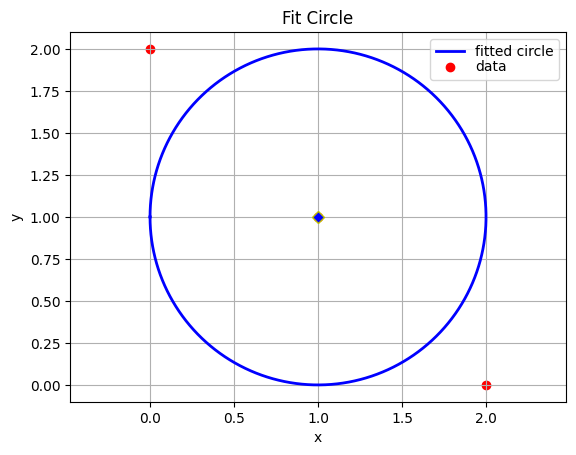

In [3]:
samples = []
xc = 1
yc= 1
r = 1
samples.append((0,2))
samples.append((1,1))
samples.append((2,0))
xs =[0,1,2]
ys = [2,1,0]
#print (np.array(samples))
#print (samples)
#circle.plot_data_circle(xs,ys,xc=xc,yc=yc,R=r)
circle.plot_data_circle(samples,xc=xc,yc=yc,r=r)


In [4]:
def generate_circle_samples(radius=1, xc=0, yc=0, rotation=0, nsamples=5,theta_start=0,theta_end=2*np.pi):
    circle_samples = []
    # Generate sample angles from 0 to 2*pi 
    angles = np.linspace(theta_start, theta_end, nsamples) 

    for angle in angles:
        x = radius*np.cos(angle+rotation) + xc
        y = radius*np.sin(angle+rotation) + yc
        circle_samples.append((x,y))   

    ic(angles)
    
    return (circle_samples)

In [5]:
def generate_circle_samples_array(radius=1, xc=0, yc=0, rotation=0, nsamples=5,theta_start=0,theta_end=2*np.pi):
    circle_samples = []
    # Generate sample angles from 0 to 2*pi 
    angles = np.linspace(theta_start, theta_end, nsamples) 

    for angle in angles:
        x = radius*np.cos(angle+rotation) + xc
        y = radius*np.sin(angle+rotation) + yc
        circle_samples.append([x,y])   

    ic(angles)
    
    return (np.array(circle_samples))

ic| angles: array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])
ic| circle_samples: [(np.float64(1.0), np.float64(0.0)),
                     (np.float64(6.123233995736766e-17), np.float64(1.0)),
                     (np.float64(-1.0), np.float64(1.2246467991473532e-16)),
                     (np.float64(-1.8369701987210297e-16), np.float64(-1.0)),
                     (np.float64(1.0), np.float64(-2.4492935982947064e-16))]
ic| xc: np.float64(-1.5445422186457905e-10)
    yc: np.float64(-4.576950980887867e-18)
    r: np.float64(1.0000000000308908)
    sigma: np.float64(1.1558296001368056e-10)


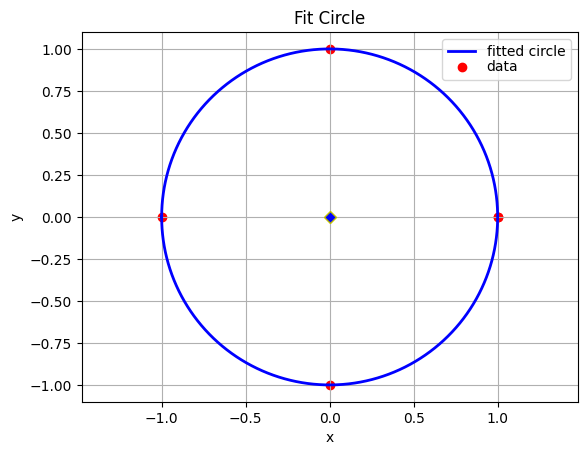

In [6]:
circle_samples = generate_circle_samples()
ic(circle_samples)
xc, yc, r, sigma = circle.least_squares_circle(circle_samples)
ic(xc, yc, r, sigma)
circle.plot_data_circle(circle_samples,xc=xc,yc=yc,r=r)

In [7]:
def calculate_angle(p1, p2):
    # Calculate the angle in radians between the two points
    x1, y1 = p1
    x2, y2 = p2
    angle1 = np.atan2(y1, x1)
    angle2 = np.atan2(y2, x2)
    
    # Calculate the difference in angles
    angle = angle2 - angle1
    return angle

In [8]:
import numpy as np

def find_affine_transform(src_points, dst_points):
    """
    Find the affine transformation matrix that maps src_points to dst_points.
    
    :param src_points: Source points in the original coordinate system.
    :param dst_points: Destination points in the new coordinate system.
    :return: 3x3 affine transformation matrix.
    """
    assert src_points.shape == dst_points.shape, "Source and destination points must have the same shape."
    
    # Create matrices for the affine transformation
    n = src_points.shape[0]
    A = np.zeros((2 * n, 6))
    B = np.zeros((2 * n))

    for i in range(n):
        A[2 * i] = [src_points[i, 0], src_points[i, 1], 1, 0, 0, 0]
        A[2 * i + 1] = [0, 0, 0, src_points[i, 0], src_points[i, 1], 1]
        B[2 * i] = dst_points[i, 0]
        B[2 * i + 1] = dst_points[i, 1]

    # Solve for the affine transformation parameters
    params, _, _, _ = np.linalg.lstsq(A, B, rcond=None)
    transform_matrix = np.array([
        [params[0], params[1], params[2]],
        [params[3], params[4], params[5]],
        [0, 0, 1]
    ])

    return transform_matrix

def apply_transform(point, transform_matrix):
    """
    Apply the affine transformation to a point.
    
    :param point: The original point (x, y) in the first coordinate system.
    :param transform_matrix: 3x3 affine transformation matrix.
    :return: Transformed point (x', y') in the second coordinate system.
    """
    original_point = np.array([point[0], point[1], 1])
    transformed_point = np.dot(transform_matrix, original_point)
    return transformed_point[:2]




ic| angles: array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])
ic| angles: array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])


Affine Transformation Matrix:
 [[-1.00000000e+00  6.66133815e-16 -4.00000000e+00]
 [-7.03535689e-16 -1.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


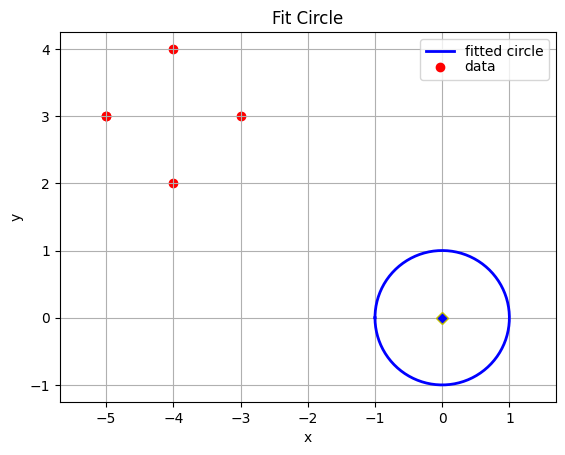

In [9]:
# Example usage
# Source and destination points (must be at least 3 pairs for affine transformation)

# Simulate generated points from calibration
simulated_src_angle = np.pi
simulated_src_xc = -4
simulated_src_yc = 3
src_points = generate_circle_samples_array(xc=simulated_src_xc,yc=simulated_src_yc,rotation=simulated_src_angle)
dst_points = generate_circle_samples_array()



# Find the affine transformation matrix
transform_matrix = find_affine_transform(src_points, dst_points)
print("Affine Transformation Matrix:\n", transform_matrix)

circle.plot_data_circle(src_points,xc=0,yc=0,r=1)

ic| xc: np.float64(-4.0)
    yc: np.float64(3.0)
    r: np.float64(1.0)
    sigma: np.float64(0.0)


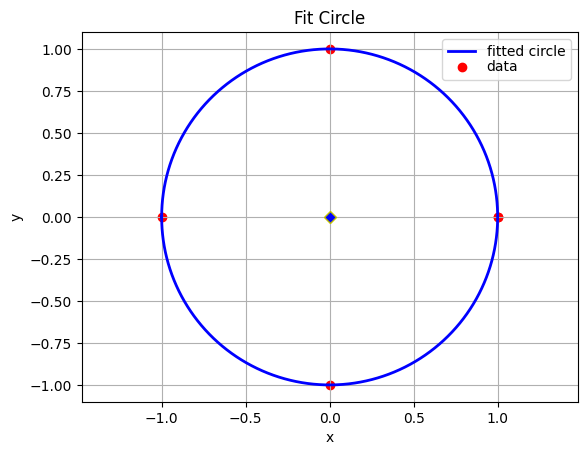

In [41]:
xc, yc, r, sigma = circle.least_squares_circle(src_points)
ic(xc, yc, r, sigma)
transformed_points = [apply_transform([x,y],transform_matrix) for x,y in src_points]

circle.plot_data_circle(transformed_points,xc=0,yc=0,r=r)

In [8]:
# Example usage
# Source and destination points (must be at least 3 pairs for affine transformation)

src_points = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

dst_points = np.array([
    [4, 5],
    [2, 3],
    [7, 8]
])

# Find the affine transformation matrix
transform_matrix = find_affine_transform(src_points, dst_points)
print("Affine Transformation Matrix:\n", transform_matrix)

# Transform a new point
new_point = [2, 3]
transformed_point = apply_transform(new_point, transform_matrix)
print(f"Original point: {new_point}")
print(f"Transformed point: {transformed_point}")

Affine Transformation Matrix:
 [[-0.19444444  0.94444444  1.13888889]
 [-0.52777778  1.27777778  1.80555556]
 [ 0.          0.          1.        ]]
Original point: [2, 3]
Transformed point: [3.58333333 4.58333333]


In [ ]:
def transform_point_dat(point, translation_vector, scale_factors, rotation_angle):
    """
    Transforms a 2D point by scaling, rotating, and translating.

    :param point: Tuple or list with the original x, y coordinates.
    :param scale_factors: Tuple or list with the scaling factors for x and y.
    :param rotation_angle: Rotation angle in radians.
    :param translation_vector: Tuple or list with the translation values for x and y.
    :return: Transformed (x, y) coordinates.
    """
    # Convert the point to a NumPy array
    point = np.array(point)
    
    # Create the scaling matrix
    scale_matrix = np.array([
        [scale_factors[0], 0],
        [0, scale_factors[1]]
    ])
    
    # Create the rotation matrix
    rotation_matrix = np.array([
        [np.cos(rotation_angle), -np.sin(rotation_angle)],
        [np.sin(rotation_angle), np.cos(rotation_angle)]
    ])
    
    # Apply scaling
    scaled_point = np.dot(scale_matrix, point)
    
    # Apply rotation
    rotated_point = np.dot(rotation_matrix, scaled_point)
    
    # Apply translation
    transformed_point = rotated_point + np.array(translation_vector)
    
    return transformed_point

# Example usage
original_point = (1, 2)
scale_factors = (2, 3)  # Scaling factors for x and y
rotation_angle = np.pi / 4  # 45 degrees in radians
translation_vector = (3, 4)  # Translation vector

transformed_point = transform_point_dat(original_point, translation_vector, scale_factors, rotation_angle)
print(f"Original point: {original_point}")
print(f"Transformed point: {transformed_point}")

In [ ]:
fixingPoint = circle_samples[0]
translation = (-xc, -yc)
scale = (1,1)
rotation_adjust = np.pi/2
ic(fixingPoint,translation, scale, rotation)
#transformed_points = [transform_point((x,y), translation, scale, np.rad2deg(rotation_adjust)) for x,y in circle_samples]
transformed_points = [transform_point_dat((x,y), translation, scale, rotation_adjust) for x,y in circle_samples]

ic(xc,xc_offset)
ic(yc,yc_offset)
ic(rotation,rotation_adjust)
circle.plot_data_circle(transformed_points, 0, 0, r)



In [ ]:
# Example points
#src_points = [(0, 0), (1, 0), (0, 1)]
#dst_points = [(2, 3), (3, 3), (2, 4)]

src_points = [(1.073488, -2.271037),(-0.387351, -1.991891),(1.363704, -0.797259)]
dst_points = [(0, 0),(1.5, 0),(0, 1.5)]

# Compute the transformation matrix
transformation_matrix = ic(compute_transformation_matrix(src_points, dst_points))

# Transform a point (x, y)
point1 = (-2.179, -3.207)
point2 = (-0.242, -2.690)
point3 = (-0.773, -0.784)
point4 = (-1.0,-1.0)

for point in [point1, point2, point3, point4]:
    transformed_point = ic(transform_point(point, transformation_matrix))

#print(f"Transformed Point: {transformed_point}")

In [ ]:
import matplotlib.pyplot as plt


# Separate the points into x and y coordinates for plotting
src_x, src_y = zip(*src_points)
dst_x, dst_y = zip(*dst_points)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(src_x, src_y, color='blue', label='Source Points')
plt.scatter(dst_x, dst_y, color='red', label='Destination Points')

# Add lines connecting corresponding points
for i in range(len(src_points)):
    plt.plot([src_points[i][0], dst_points[i][0]], [src_points[i][1], dst_points[i][1]], 'gray', linestyle='--')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Source and Destination Points')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import numpy as np

def calculate_circle(points):
    # Convert the list of points to a NumPy array
    points = np.array(points)
    
    # Prepare the matrices for the least squares calculation
    x = points[:, 0]
    y = points[:, 1]
    
    # Calculate the coefficients using the least squares method
    A = np.c_[x, y, np.ones(len(x))]
    b = x**2 + y**2
    
    # Solve the equation A * [h, k, C] = b
    coeffs = np.linalg.lstsq(A, b, rcond=None)[0]
    
    h, k, C = coeffs
    # The radius is calculated from the center
    r = np.sqrt(h**2 + k**2 + C)
    
    return h, k, r



In [ ]:

# Example array of points on the circle
points = np.array([
    [1.2685409784317017,-1.2855279445648193],
    [0.4610433280467987, -1.4789505004882812],
    [0.10663176327943802, -2.030184745788574]
])

h, k, r = calculate_circle(points)

print(f"Center of the circle: ({h:.2f}, {k:.2f})")
print(f"Radius of the circle: {r:.2f}")
print(f"Circle equation: (x - {h:.2f})^2 + (y - {k:.2f})^2 = {r**2:.2f}")



In [ ]:
newPoints = [(0.1172790378332138, -2.0815389156341553), (0.13003531098365784, -2.0311286449432373), (0.1446872055530548, -1.980210781097412), (0.16282092034816742, -1.9294254779815674), (0.1850621998310089, -1.8782325983047485), (0.20989999175071716, -1.8281124830245972), (0.23808307945728302, -1.777306079864502), (0.2717342972755432, -1.7264182567596436), (0.3104494512081146, -1.6757774353027344), (0.35316213965415955, -1.6251628398895264), (0.4011218249797821, -1.5748447179794312), (0.451546311378479, -1.5388946533203125), (0.4983119070529938, -1.4879955053329468), (0.5429137945175171, -1.4376658201217651), (0.5934383869171143, -1.4096862077713013), (0.6442127823829651, -1.3851996660232544), (0.6945139765739441, -1.3694506883621216), (0.745102047920227, -1.3547362089157104), (0.7955855131149292, -1.3332085609436035), (0.8465850353240967, -1.317476511001587), (0.8975532650947571, -1.3095701932907104), (0.9483062624931335, -1.3017194271087646), (0.998540997505188, -1.2962006330490112), (1.0496501922607422, -1.294082522392273), (1.1003813743591309, -1.296460509300232), (1.1507503986358643, -1.2991588115692139), (1.2007719278335571, -1.2985177040100098), (1.2507834434509277, -1.3123250007629395)]
src_x, src_y = zip(*newPoints)


# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(src_x, src_y, color='blue', label='Source Points')

# Add lines connecting corresponding points
for i in range(len(src_points)):
    plt.plot([src_points[i][0], dst_points[i][0]], [src_points[i][1], dst_points[i][1]], 'gray', linestyle='--')

# Add labels and title

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Source and Destination Points')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The first point in the array is (0,r) in FRC coordinates

In [ ]:
import circle_fit as circle

points = [(0.37510570883750916, -0.8342843651771545), (0.3248334228992462, -0.8295403718948364), (0.2743622362613678, -0.826815664768219), (0.22401097416877747, -0.8275769352912903), (0.17294949293136597, -0.8313215374946594), (0.12292873114347458, -0.8372471332550049), (0.07161729037761688, -0.8454130291938782), (0.01786799728870392, -0.8572217226028442), (-0.03314237296581268, -0.8717595338821411), (-0.08444882184267044, -0.8877468109130859), (-0.1356864869594574, -0.909177303314209), (-0.1858465075492859, -0.931339681148529), (-0.23588553071022034, -0.9617758989334106), (-0.286144495010376, -1.0021570920944214), (-0.3378433287143707, -1.047621726989746), (-0.3886015713214874, -1.0919877290725708), (-0.4402550458908081, -1.1180927753448486), (-0.48958367109298706, -1.1719499826431274), (-0.5303281545639038, -1.2228316068649292), (-0.5668140053749084, -1.2742542028427124), (-0.6018678545951843, -1.3261003494262695), (-0.6521179676055908, -1.4362637996673584), (-0.6704638600349426, -1.4875242710113525), (-0.688291072845459, -1.5409655570983887), (-0.7009204030036926, -1.5936079025268555), (-0.7120699286460876, -1.64723539352417), (-0.7195438146591187, -1.699013352394104), (-0.7226626873016357, -1.7497444152832031), (-0.7238384485244751, -1.8031448125839233), (-0.7230956554412842, -1.853276252746582), (-0.7182620763778687, -1.9036403894424438), (-0.7122184634208679, -1.9541934728622437), (-0.7006244659423828, -2.011301279067993), (-0.6879056692123413, -2.063897132873535), (-0.674543559551239, -2.1150455474853516), (-0.6561917066574097, -2.1685309410095215), (-0.6420400142669678, -2.2203590869903564), (-0.6245172619819641, -2.2724807262420654), (-0.6038203835487366, -2.325279474258423), (-0.5710437297821045, -2.3755252361297607), (-0.5205249786376953, -2.4249510765075684), (-0.4698893129825592, -2.4555160999298096), (-0.42012810707092285, -2.506366729736328), (-0.3690338730812073, -2.5524473190307617), (-0.3183332085609436, -2.58925724029541), (-0.26611652970314026, -2.6258749961853027), (-0.21426011621952057, -2.654890537261963), (-0.16310039162635803, -2.6799442768096924), (-0.1130872517824173, -2.70158052444458), (-0.06033956632018089, -2.7201483249664307), (-0.007142858579754829, -2.736077070236206), (0.04541667550802231, -2.749640464782715), (0.096783347427845, -2.7590763568878174), (0.14940038323402405, -2.764655351638794), (0.20081856846809387, -2.7684860229492188), (0.2514599561691284, -2.7703349590301514), (0.30442681908607483, -2.7689523696899414), (0.35688185691833496, -2.7641441822052), (0.40710821747779846, -2.756194829940796), (0.4572412967681885, -2.7465760707855225), (0.5080640316009521, -2.734013080596924), (0.5590968728065491, -2.7164647579193115), (0.6093403100967407, -2.6901438236236572), (0.6608644127845764, -2.6637051105499268), (0.7123205065727234, -2.6389217376708984), (0.7634175419807434, -2.612981081008911), (0.8140966296195984, -2.5843396186828613), (0.8642556071281433, -2.547771453857422), (0.9158142805099487, -2.507453441619873), (0.9576622843742371, -2.456725597381592), (1.0026576519012451, -2.4065487384796143), (1.0446642637252808, -2.355674982070923), (1.0769941806793213, -2.3046677112579346), (1.1121665239334106, -2.2537355422973633), (1.1342887878417969, -2.203183889389038), (1.156294584274292, -2.1523985862731934), (1.174515724182129, -2.101193428039551), (1.1899540424346924, -2.0509696006774902), (1.2030394077301025, -1.998249888420105), (1.2121891975402832, -1.9468461275100708), (1.220396637916565, -1.8967406749725342), (1.2249929904937744, -1.8452216386795044), (1.2259081602096558, -1.7935140132904053), (1.2241673469543457, -1.74313223361969), (1.221623182296753, -1.6927318572998047), (1.2108800411224365, -1.6426976919174194), (1.2041176557540894, -1.5926928520202637), (1.194579839706421, -1.5421632528305054), (1.1786274909973145, -1.4920830726623535), (1.1577316522598267, -1.4420266151428223), (1.1334922313690186, -1.3864538669586182), (1.1093885898590088, -1.3352971076965332), (1.0833134651184082, -1.284781813621521), (1.0501214265823364, -1.2347010374069214), (1.0109409093856812, -1.184482455253601), (0.9670594334602356, -1.1338047981262207), (0.9165676832199097, -1.083878993988037), (0.8657959699630737, -1.0387115478515625), (0.8151199817657471, -1.0030828714370728), (0.7638719081878662, -0.9683163166046143), (0.7132079601287842, -0.9434131979942322), (0.6623708605766296, -0.9125620722770691), (0.6112207174301147, -0.8934564590454102), (0.559902012348175, -0.8762336373329163), (0.509800374507904, -0.8607336282730103), (0.45836520195007324, -0.8442651033401489), (0.4077111482620239, -0.8379084467887878), (0.35752221941947937, -0.8308752775192261), (0.3063535988330841, -0.8252866864204407), (0.2535272240638733, -0.8263100385665894), (0.20282530784606934, -0.8290849328041077)]
xc, yc, r, sigma = circle.standardLSQ(points)
print(sigma)
print(xc,yc,r)
circle.plot_data_circle(points,xc,yc,r)

In [ ]:
circle.plot_data_circle(points,0,0,r)